# Setup

## Evaluations

- Submissions are evaluated using the Normalized Gini Coefficient.

## Formats

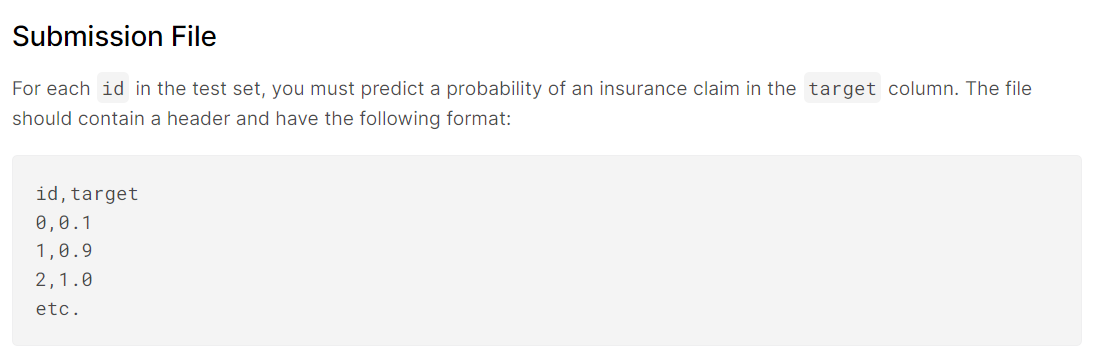

# EDA

## library

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['font.family'] = 'Malgun Gothic'

import seaborn as sns 

## Load data 

In [2]:
train = pd.read_csv('dataset/train.csv', index_col = 'id')
test = pd.read_csv('dataset/test.csv', index_col = 'id')
submission = pd.read_csv('dataset/sample_submission.csv', index_col = 'id')

In [3]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [4]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

결측이 없다고 나오지만, 실제로는 결측이 -1로 표시되어있기 때문에 없다고 나오는 것이다. 
> -1을 np.nan으로 대체

<AxesSubplot:>

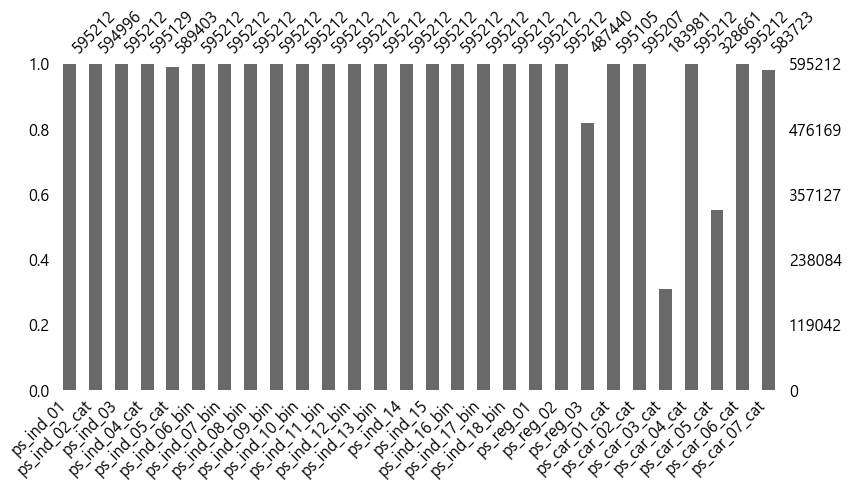

In [7]:
import numpy as np 
import missingno as msno

# train data를 복사
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 시각화(처음 28개만)
msno.bar(df = train_copy.iloc[:, 1:29], figsize = (13, 6))

<AxesSubplot:>

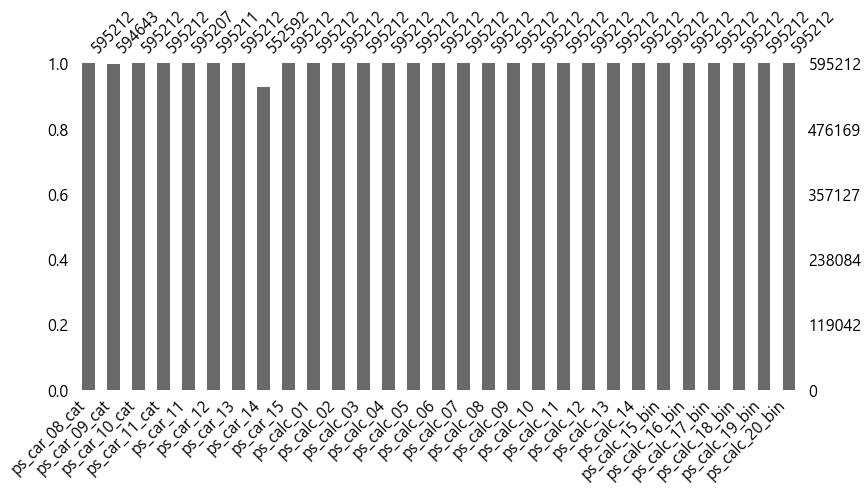

In [8]:
# 결측값 시각화(뒤의 28개만)
msno.bar(df = train_copy.iloc[:, 29:], figsize = (13, 6))

**결측값 matrix 형태로 시각화하기**

<AxesSubplot:>

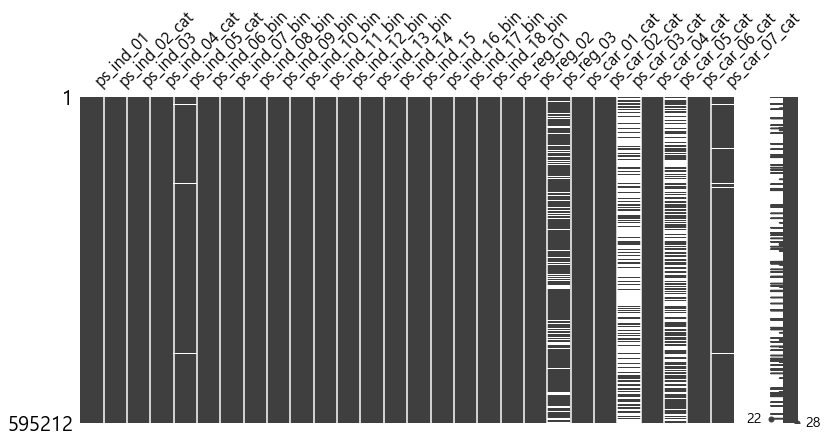

In [11]:
msno.matrix(df = train_copy.iloc[:, 1:29], figsize = (13, 6))

<AxesSubplot:>

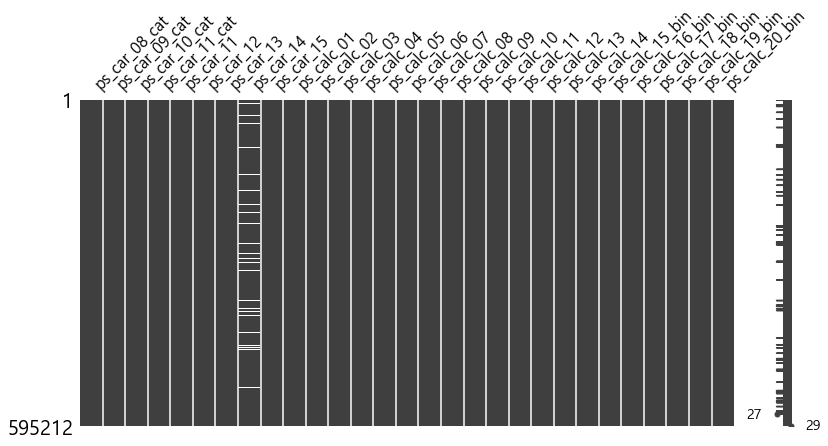

In [12]:
msno.matrix(df = train_copy.iloc[:, 29:], figsize = (13, 6))

## 피처 요약표

In [34]:
def resumetable(df) : 
    print(f'dataset shape : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary['결측값개수'] = (df == -1).sum().values
    summary['고유값개수'] = df.nunique().values
    summary['데이터종류'] = None
    for col in df.columns : 
        if 'bin' in col or col == 'target' : 
            summary.loc[col, '데이터종류'] = '이진형'
            
        elif 'cat' in col : 
            summary.loc[col, '데이터종류'] = '범주형'
            
        elif df[col].dtype == 'float64' : 
            summary.loc[col, '데이터종류'] = '연속형'
            
        elif df[col].dtype == 'int64' : 
            summary.loc[col, '데이터종류'] = '순서형'
    
    
    return summary

In [36]:
summary = resumetable(train)
summary

dataset shape : (595212, 58)


,데이터 타입,결측값개수,고유값개수,데이터종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,범주형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,범주형
ps_ind_05_cat,int64,5809,8,범주형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


## visualization

In [37]:
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline 

### target distribution

Text(0.5, 1.0, 'Target Distribution')

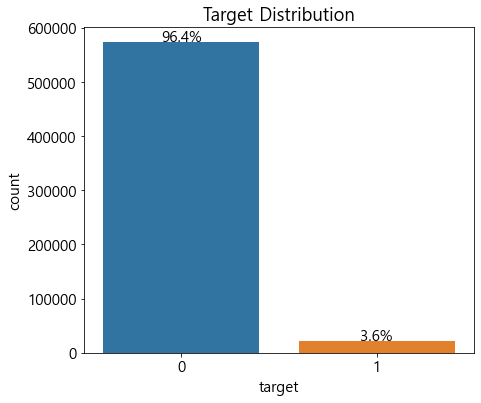

In [45]:
def write_percent(ax, total_size) : 
    for patch in ax.patches : 
        height = patch.get_height() 
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100
        
        ax.text(left_coord + width/2,
                height + total_size * 0.001,
                '{:.1f}%'.format(percent),
                ha = 'center')
        
mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))

ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')
        

**타깃값이 불균형하다.**
> 낮은 비율의 타깃값 1을 잘 예측하는 것이 중요하다. 따라서 각 피처의 고유값별 타깃값 1의 비율을 탐색


### 이진 피처

In [49]:
import matplotlib.gridspec as gridspec

In [53]:
def plot_target_ratio_by_features(df, features, num_rows, num_cols, size = (12, 18)) : 
    mpl.rc('font', size = 9)
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    for idx, feature in enumerate(features) : 
        ax = plt.subplot(grid[idx])
        sns.barplot(x = feature, y = 'target', data = df, palette = 'Set2', ax = ax)

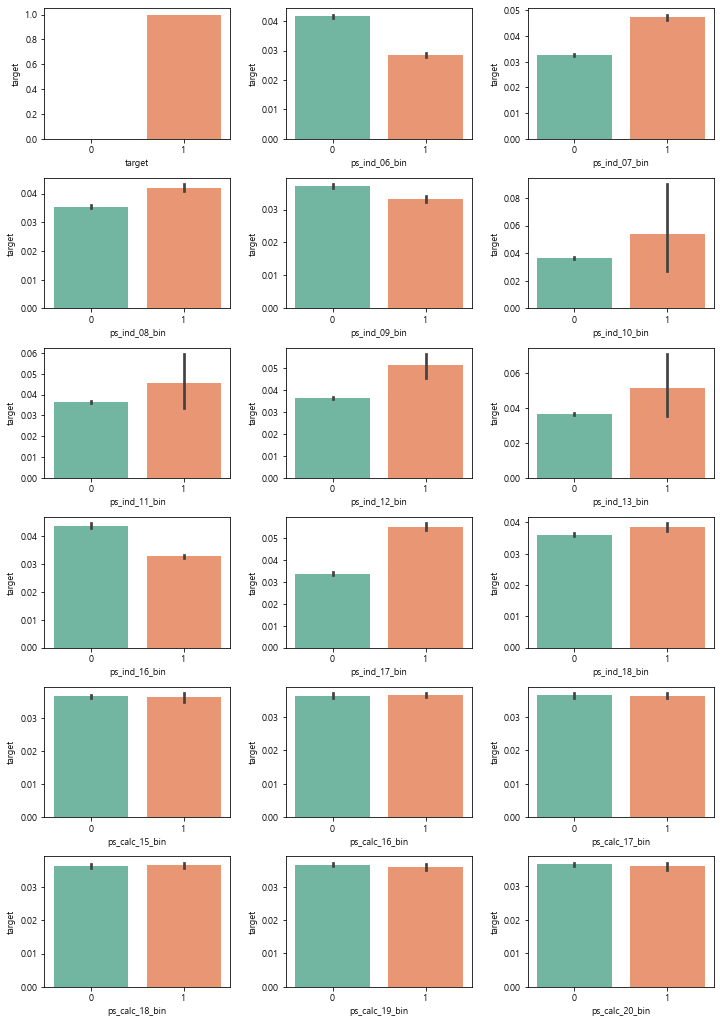

In [54]:
bin_features = summary[summary['데이터종류'] == '이진형'].index

plot_target_ratio_by_features(train, bin_features, 6, 3)

**ps_ind_10_bin, ps_ind_11_bin, ps_ind_13_bin, ps_ind_18_bin, ps_calc_15_bin ~ ps_calc_20_bin**은 예측력이 없다고 판단되므로 삭제

### 명목형 피처

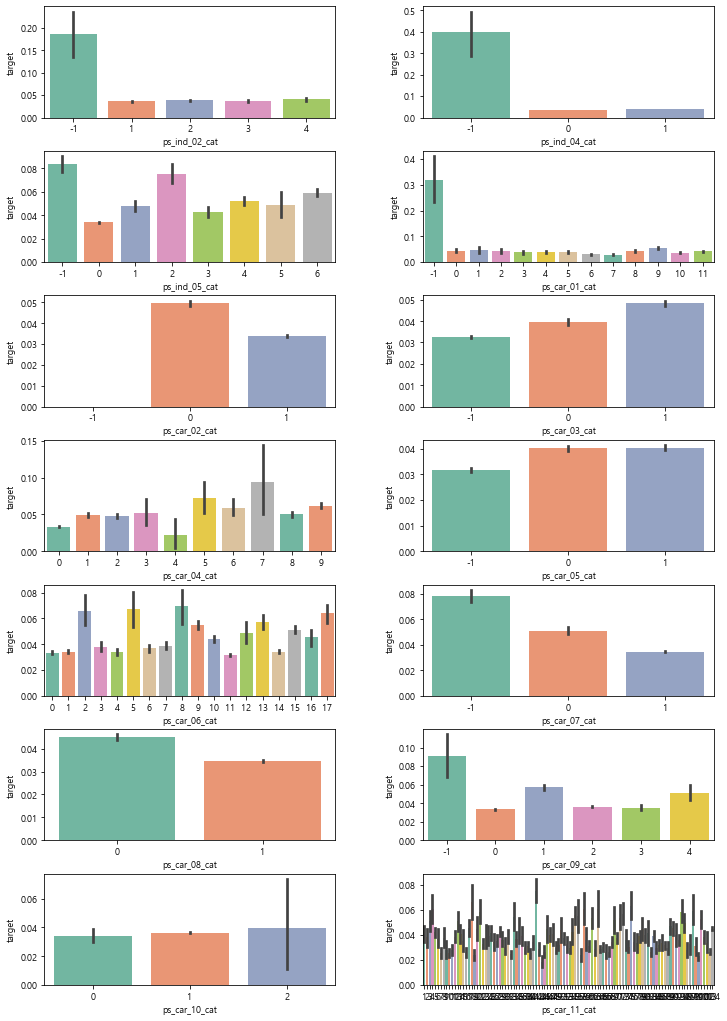

In [64]:
nom_features = summary[summary['데이터종류'] == '범주형'].index

plot_target_ratio_by_features(train, nom_features, 7, 2)

ps_int_02_cat을 보면 결측인 경우 타깃값 1의 비율이 신뢰구간을 감안하더라도 다른 값들에 비해 높은 것을 알 수 있다. 
> 결측 자체도 하나의 고유값이라고 고려할 필요가 있음 

우선 모든 변수를 다 이용

### 순서형 피처

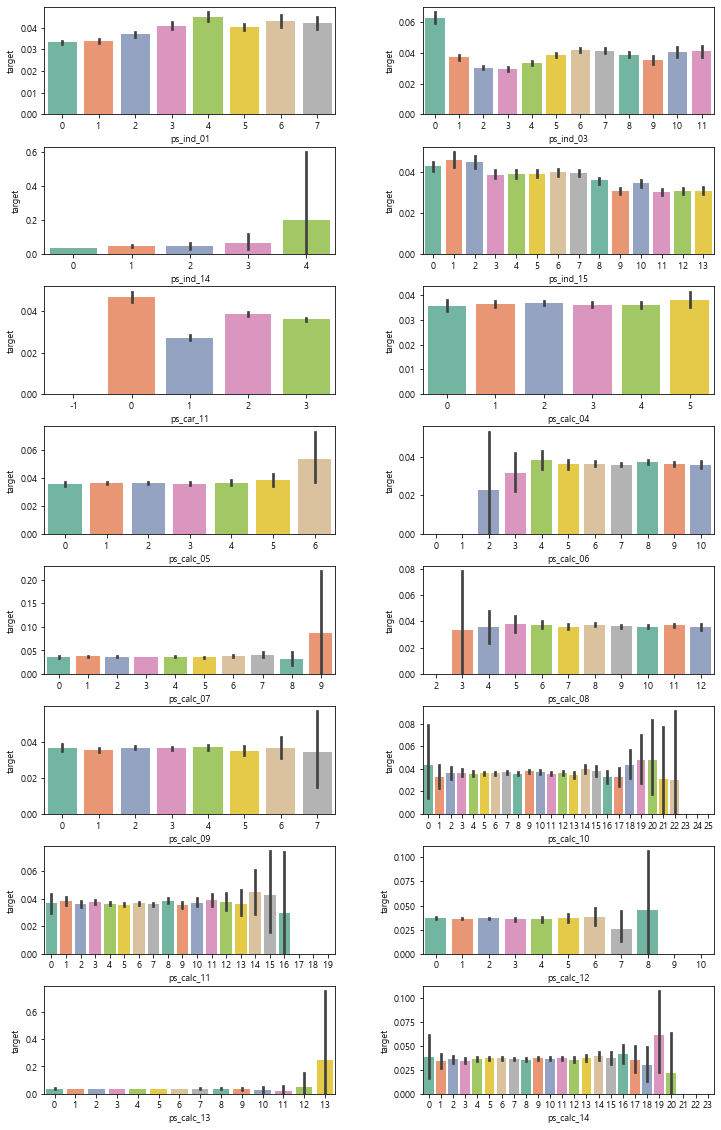

In [66]:
ord_features = summary[summary['데이터종류'] == '순서형'].index

plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20))

**ps_ind_14, ps_calc_04 ~ ps_calc_14~** 는 고유값에 상관없이 타깃 1의 비율이 거의 비슷하거나, 다르다고 해도 신뢰구간이 넓기 때문에 삭제

### 연속형 피처

연속형 피처는 구간별로 비율을 확인
> `pd.cut`이용 

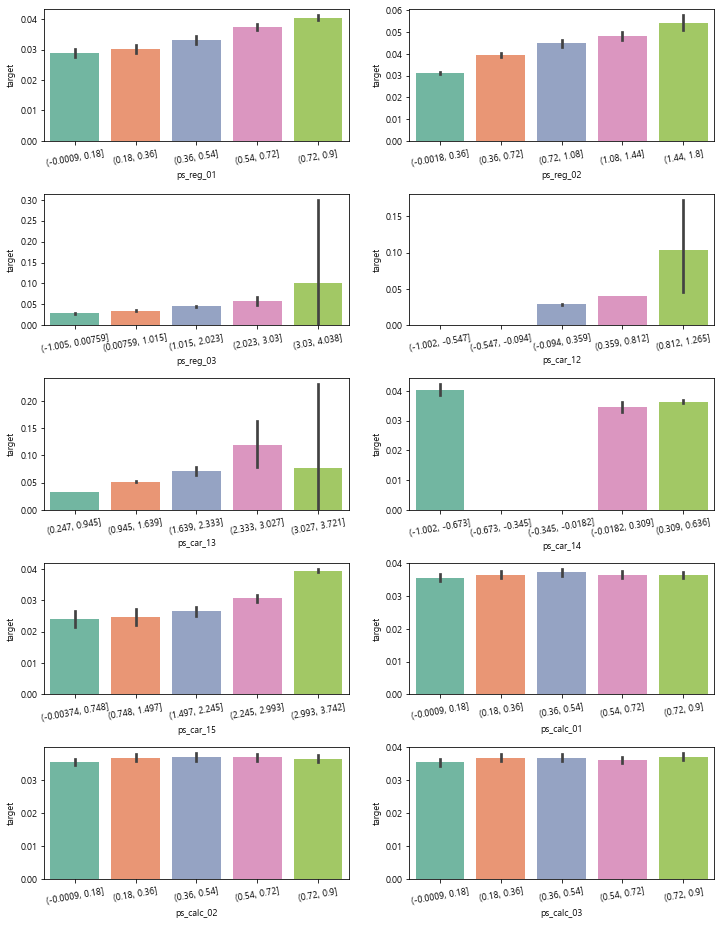

In [67]:
cont_features = summary[summary['데이터종류'] == '연속형'].index

plt.figure(figsize = (12, 16))
grid = gridspec.GridSpec(5, 2)
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

for idx, feature in enumerate(cont_features) : 
    train[feature] = pd.cut(train[feature], 5)
    
    ax = plt.subplot(grid[idx])
    sns.barplot(x = feature, y = 'target', data = train, palette = 'Set2', ax = ax)
    ax.tick_params(axis = 'x', labelrotation = 10)


calc 변수를 삭제

### 연속형 피처 II 
- 상관계수 확인

<AxesSubplot:>

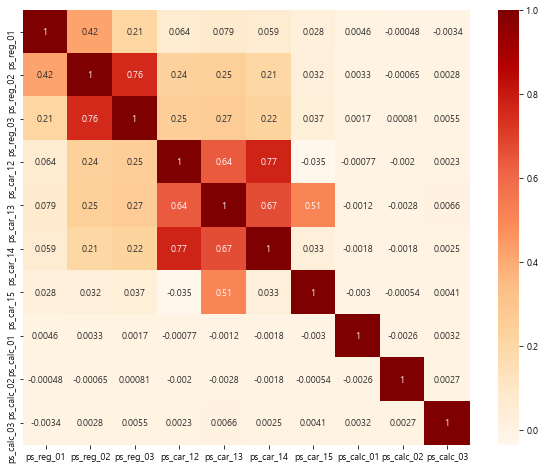

In [68]:
# 결측값 제거
train_copy = train_copy.dropna()

plt.figure(figsize = (10, 8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot = True, cmap = 'OrRd')

ps_car_12와 ps_car_14가 강한 상관관계를 보인다.(상관계수 0.77)
> 두 변수 중 하나를 제거할지 말지 고민해야 함 

ps_reg_02와 ps_reg_03이 강한 상관관계를 보인다.(상관계수 0.77)
> 두 변수 중 하나를 제거할지 말지 고민해야 함 

결과적으로는 ps_car_14를 제거한 경우는 성능이 올랐고, ps_reg_03을 제거하면 성능이 떨어짐 
> ps_car_14는 ps_car_12 뿐만 아니라 ps_car_13과도 상관관계가 강했기 때문에 제거했을 때 성능이 올랐을 가능성이 있음 